In [ ]:
from google.colab import files


uploaded = files.upload()

Saving training.1600000.processed.noemoticon.csv to training.1600000.processed.noemoticon.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import re
%matplotlib inline

!pip install nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

!pip install wordcloud
from wordcloud import WordCloud

!pip install tweet-preprocessor
import preprocessor as p

from gensim.models import KeyedVectors

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
colNames = ['target', 'id', 'date', 'flag', 'user', 'text']
randTweets = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = "ISO-8859-1",
            names=colNames)

In [ ]:
randTweets.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
randTweets[randTweets.columns[0]].count()

1600000

In [ ]:
randTweets.info

<bound method DataFrame.info of          target          id                          date      flag  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  
0        _TheSpecialOne_  @switchfoot

In [ ]:
randomTweets = randTweets.copy().sample(8000, random_state=0)
randomTweets["label"] = 0
randomTweets = randomTweets[['text', 'label']]
randomTweets.dropna(inplace=True)
randomTweets.head()

,text,label
557138,wants to compete! i want hard competition! i w...,0
349381,It seems we are stuck on the ground in Amarill...,0
182051,where the f are my pinking shears? rarararrrar...,0
571236,0ff t0 tHE MEEtiN.. i HAtE WhEN PPl V0lUNtEER...,0
1339637,@ reply me pls,0


In [ ]:
from google.colab import files


uploaded = files.upload()

Saving depressive_tweets_processed.csv to depressive_tweets_processed.csv


In [ ]:
colNames = ['id', 'text']

twintTweets = pd.read_csv('depressive_tweets_processed.csv', sep = '|', header = None, usecols = [0,5], nrows = 2500, names=colNames)

In [ ]:
twintTweets.head()

,id,text
0,989292962323615744,The lack of this understanding is a small but ...
1,989292959844663296,i just told my parents about my depression and...
2,989292951716155392,depression is something i don't speak about ev...
3,989292873664393218,Made myself a tortilla filled with pb&j. My de...
4,989292856119472128,@WorldofOutlaws I am gonna need depression med...


In [ ]:
twintTweets[twintTweets.columns[0]].count()

2345

In [ ]:
twintTweets['label'] = 1
twintTweets = twintTweets[['text', 'label']]
twintTweets.head()

,text,label
0,The lack of this understanding is a small but ...,1
1,i just told my parents about my depression and...,1
2,depression is something i don't speak about ev...,1
3,Made myself a tortilla filled with pb&j. My de...,1
4,@WorldofOutlaws I am gonna need depression med...,1


In [ ]:
twintTweets.info

<bound method DataFrame.info of                                                    text  label
0     The lack of this understanding is a small but ...      1
1     i just told my parents about my depression and...      1
2     depression is something i don't speak about ev...      1
3     Made myself a tortilla filled with pb&j. My de...      1
4     @WorldofOutlaws I am gonna need depression med...      1
...                                                 ...    ...
2340  Many sufferers of depression aren't sad; they ...      1
2341  No Depression by G Herbo is my mood from now o...      1
2342  What do you do when depression succumbs the br...      1
2343  Ketamine Nasal Spray Shows Promise Against Dep...      1
2344  dont mistake a bad day with depression! everyo...      1

[2345 rows x 2 columns]>

In [ ]:
combinedTweets = pd.concat([randomTweets, twintTweets])
combinedTweets.info

<bound method DataFrame.info of                                                       text  label
557138   wants to compete! i want hard competition! i w...      0
349381   It seems we are stuck on the ground in Amarill...      0
182051   where the f are my pinking shears? rarararrrar...      0
571236   0ff t0 tHE MEEtiN..  i HAtE WhEN PPl V0lUNtEER...      0
1339637                                    @ reply me pls       0
...                                                    ...    ...
2340     Many sufferers of depression aren't sad; they ...      1
2341     No Depression by G Herbo is my mood from now o...      1
2342     What do you do when depression succumbs the br...      1
2343     Ketamine Nasal Spray Shows Promise Against Dep...      1
2344     dont mistake a bad day with depression! everyo...      1

[10345 rows x 2 columns]>

In [ ]:
mixedTweets = combinedTweets.sample(frac = 1)
mixedTweets.info

<bound method DataFrame.info of                                                       text  label
1532167  @SingleGal I'm always doing that (muuuhahahaha)        0
656      @luna_libertatis <Emoji: Loudly crying face> i...      1
1501665  after reading the book and watching the movie,...      0
1370986   Hugh Laurie is awesome. Thats why it's trending       0
1969     I got the cuddles and besitos I wanted, yet my...      1
...                                                    ...    ...
1595893  So my goal last night of going to sleep at 10....      0
815842                         watching Miley cyrus on E!       0
1372531                           @gerbyman hehe i likey!       0
1408505                              Good morning people!       0
503802                  i wish i had more twitter friends       0

[10345 rows x 2 columns]>

In [ ]:
contractionList = {
  "isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
  "haven't":"have not", "hasn't":"has not", "hadn't":"had not", "won't":"will not",
  "wouldn't":"would not", "don't":"do not", "doesn't":"does not", "didn't":"did not",
  "can't":"can not", "couldn't":"could not", "shouldn't":"should not",
  "mightn't":"might not", "mustn't":"must not", "ain't" : "am not",
  "aren't": "are not", "can't": "cannot", "can't've": "cannot have",
  "'cause": "because", "could've": "could have", "couldn't": "could not",
  "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not",
  "don't": "do not", "hadn't": "had not", "hadn't've": "had not have",
  "hasn't": "has not", "haven't": "have not", "he'd": "he would",
  "he'd've": "he would have", "he'll": "he will",
  "he'll've": "he will have", "he's": "he is", "how'd": "how did",
  "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would",
  "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
  "I'm": "I am", "I've": "I have", "isn't": "is not", "it'd": "it had",
  "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
  "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not",
  "might've": "might have", "mightn't": "might not", "mightn't've": "might not have",
  "must've": "must have", "mustn't": "must not", "mustn't've": "must not have",
  "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock",
  "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
  "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would",
  "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have",
  "she's": "she is", "should've": "should have", "shouldn't": "should not",
  "shouldn't've": "should not have", "so've": "so have", "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"

}

c_re = re.compile('(%s)' % '|'.join(contractionList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return contractionList[match.group(0)]
    return c_re.sub(replace, text)

In [ ]:
reSymbols = re.compile('[^0-9a-z #+_]')

In [ ]:
def cleanTweets(tweets):
    cleanedTweets = []
    for tweet in tweets:
        tweet = str(tweet)
        tweet = tweet.lower()
        tweet = reSymbols.sub(' ', tweet)
        tweet = p.clean(tweet)
        tweet = expandContractions(tweet)
        tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())
        wordTokens = nltk.word_tokenize(tweet)
        filteredSentence = [word for word in wordTokens if not word in set(stopwords.words('english'))]
        tweet = ' '.join(filteredSentence)
        cleanedTweets.append(tweet)
    return cleanedTweets

In [ ]:
X = cleanTweets([tweet for tweet in mixedTweets['text']])

In [ ]:
X

['worse signal',
 'misterbyrne hayfever friend',
 'tianamichelle lol listen song myspace put love',
 'pubs bonus ball thingy number rollover afford stuff lol',
 'watching hose racing livestream betting unfortunately successful far',
 'karthik good suggestion sir hear buzz every time new academic year starts n nothing happens sad',
 'omgomgomgogmogmggg fox eaten peardrop iasuhfiysafygasifgs',
 'difficult get poverty something happens vacuum addiction one many unfortunately often first people consider also illiteracy mental health issues like depression ben carson help https www washingtonpost com news wonk wp hud secretary ben carson propose rent increases low income americans receiving federal housing subsidies noredirect utm term d1',
 'like depression https twitter com avengers status',
 'love sleeping sundays woke near spent last hour drinking coffee reading news perfectly lazy',
 'north korea supposedly jesting strictly range hit alaska bubbye finally palin',
 'goodmorning',
 'clic

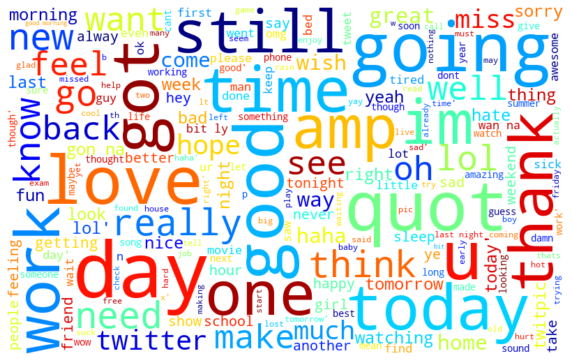

In [ ]:
randomCleaned = [cleanTweets([t for t in randomTweets['text']])]
randomWords = ' '.join(list(map(str, randomCleaned)))
wordcloud = WordCloud(background_color='white', colormap='jet', width=800, height=500, random_state=0, max_font_size=110).generate(randomWords)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

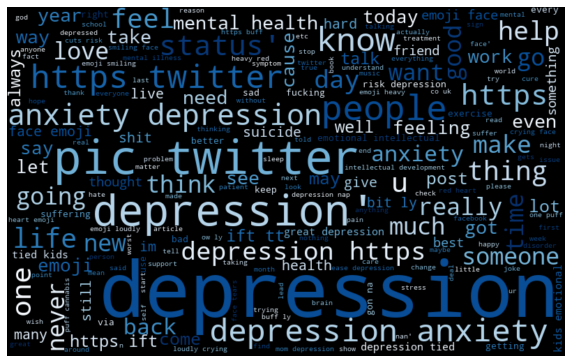

In [ ]:
depressiveCleaned = [cleanTweets([t for t in twintTweets['text']])]
depressiveWords = ' '.join(list(map(str, depressiveCleaned)))
wordcloud = WordCloud(colormap='Blues', width=800, height=500, random_state=0, max_font_size=110).generate(depressiveWords)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [ ]:
MAX_NUM_WORDS = 10000
tokenizer= Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(X)
word_sequence = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index
uniqueTokens = len(word_index)
uniqueTokens

20605

In [ ]:
MAX_SEQUENCE_LENGTH = 200
input_tensor = pad_sequences(word_sequence, maxlen=MAX_SEQUENCE_LENGTH)
print(input_tensor)

[[   0    0    0 ...    0  563 4331]
 [   0    0    0 ... 6627 2665  140]
 [   0    0    0 ...  751  267   16]
 ...
 [   0    0    0 ... 3160   10 3022]
 [   0    0    0 ... 1068  147  226]
 [   0    0    0 ...  154 2744  102]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input_tensor, mixedTweets['label'], test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_cf_matrix = confusion_matrix(y_test,y_pred)
print(logreg_cf_matrix)
print(classification_report(y_test,y_pred))
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

[[1593   20]
 [ 334  122]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1613
           1       0.86      0.27      0.41       456

    accuracy                           0.83      2069
   macro avg       0.84      0.63      0.65      2069
weighted avg       0.83      0.83      0.79      2069

Accuracy of logistic regression classifier on test set: 0.8289


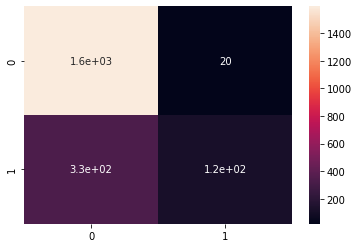

In [ ]:
sns.heatmap(logreg_cf_matrix, annot=True)

In [ ]:
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)
y_pred = svm.predict(X_test)
svm_cf_matrix = confusion_matrix(y_test,y_pred)
print(svm_cf_matrix)
print(classification_report(y_test,y_pred))
print('Accuracy of SVM classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))

[[1585   28]
 [ 320  136]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1613
           1       0.83      0.30      0.44       456

    accuracy                           0.83      2069
   macro avg       0.83      0.64      0.67      2069
weighted avg       0.83      0.83      0.80      2069

Accuracy of SVM classifier on test set: 0.8318


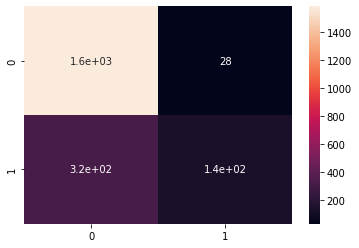

In [ ]:
sns.heatmap(svm_cf_matrix, annot=True)

In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)
y_pred = dtree.predict(X_test)
dtree_cf_matrix = confusion_matrix(y_test,y_pred)
print(dtree_cf_matrix)
print(classification_report(y_test,y_pred))
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))

[[1571   42]
 [  46  410]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1613
           1       0.91      0.90      0.90       456

    accuracy                           0.96      2069
   macro avg       0.94      0.94      0.94      2069
weighted avg       0.96      0.96      0.96      2069

Accuracy of decision tree classifier on test set: 0.9575


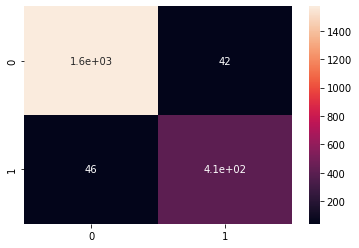

In [ ]:
sns.heatmap(dtree_cf_matrix, annot=True)

In [ ]:
rforest= RandomForestClassifier(n_estimators=100,)
rforest.fit(X_train,y_train)
rforest.score(X_test,y_test)
y_pred = rforest.predict(X_test)
rforest_cf_matrix = confusion_matrix(y_test,y_pred)
print(rforest_cf_matrix)
print(classification_report(y_test,y_pred))
print('Accuracy of random forest classifier on test set: {:.4f}'.format(rforest.score(X_test, y_test)))

[[1586   27]
 [  45  411]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1613
           1       0.94      0.90      0.92       456

    accuracy                           0.97      2069
   macro avg       0.96      0.94      0.95      2069
weighted avg       0.96      0.97      0.96      2069

Accuracy of random forest classifier on test set: 0.9652


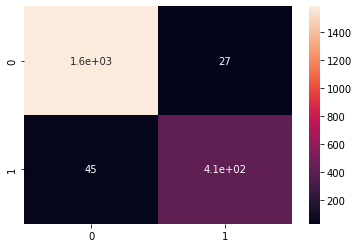

In [ ]:
sns.heatmap(rforest_cf_matrix, annot=True)